# Exploratory Data Analysis

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [47]:
df = pd.read_csv('../clean_data/movies.csv')
df.describe(include='all')

,id_peli,title,budget,revenue,return,original_language,release_year,release_date,runtime,popularity,vote_average,vote_count
count,41765.000000,41765,4.176500e+04,4.176500e+04,4.176500e+04,41755,41765.000000,41765,41529.000000,41765.000000,41765.000000,41765.000000
unique,NaN,41715,NaN,NaN,NaN,88,NaN,16300,NaN,NaN,NaN,NaN
top,NaN,Eye For An Eye,NaN,NaN,NaN,en,NaN,2008-01-01,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,29518,NaN,127,NaN,NaN,NaN,NaN
mean,110453.064647,NaN,4.407573e+06,1.172123e+07,7.170354e+02,NaN,1992.827008,NaN,94.013533,2.956339,5.620546,114.211565
std,113820.563782,NaN,1.790885e+07,6.622383e+07,7.785516e+04,NaN,23.540768,NaN,38.167368,6.144492,1.914442,504.001804
min,2.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1874.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,26603.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1980.000000,NaN,85.000000,0.390142,5.000000,3.000000
50%,61341.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2002.000000,NaN,95.000000,1.138013,6.000000,10.000000
75%,162435.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2011.000000,NaN,107.000000,3.753097,6.800000,35.000000


In [189]:
df.corr()

C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id_peli,budget,revenue,return,release_year,runtime,popularity,vote_average,vote_count
id_peli,1.000000,-0.103249,-0.071790,-0.007136,0.290796,-0.119407,-0.076432,-0.158276,-0.064350
budget,-0.103249,1.000000,0.771633,-0.002259,0.130437,0.138184,0.448751,0.075091,0.679296
revenue,-0.071790,0.771633,1.000000,0.000732,0.088238,0.107430,0.505147,0.085105,0.812086
return,-0.007136,-0.002259,0.000732,1.000000,-0.005713,0.000973,0.003231,0.005845,0.003583
release_year,0.290796,0.130437,0.088238,-0.005713,1.000000,0.085575,0.135092,0.037579,0.107969
runtime,-0.119407,0.138184,0.107430,0.000973,0.085575,1.000000,0.130266,0.162013,0.117435
popularity,-0.076432,0.448751,0.505147,0.003231,0.135092,0.130266,1.000000,0.152090,0.555273
vote_average,-0.158276,0.075091,0.085105,0.005845,0.037579,0.162013,0.152090,1.000000,0.124907
vote_count,-0.064350,0.679296,0.812086,0.003583,0.107969,0.117435,0.555273,0.124907,1.000000


C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\88233728.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


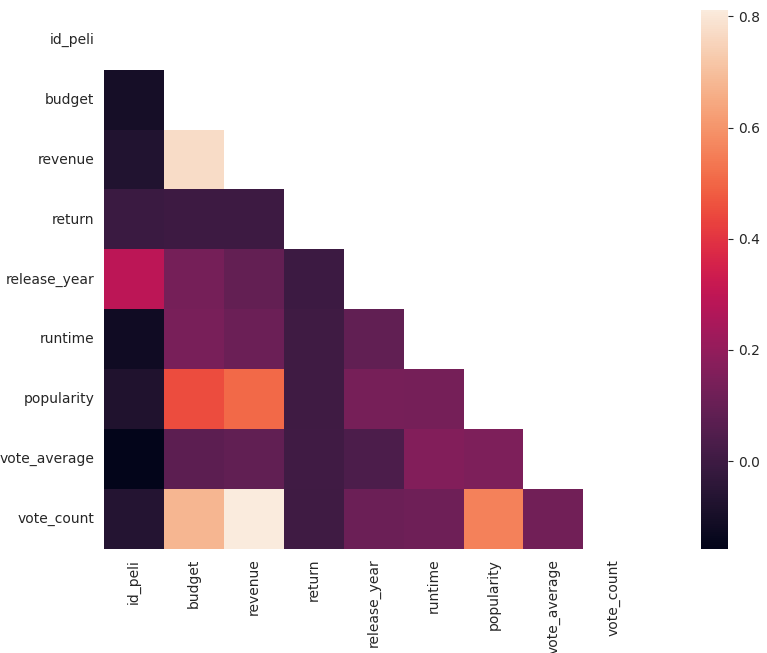

In [190]:
plt.figure(figsize=(15,7))
# df.corr() creates a correlation matrix 
corr_matrix = df.corr()
# helps in creating a 0's matrix of df.corr() shape
mask = np.zeros_like(corr_matrix)
# Returns copy of array with lower part of the triangle
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True)

In [193]:
# sourcery skip: use-fstring-for-concatenation
# Ahora vamos a obtener aquellos pares de variables que tengan una correlación mayor a 0.4
df = pd.read_csv('../clean_data/movies.csv')
dfx = np.isnan(df.corr()[(df.corr() > 0.4) & (df.corr() < 1)])

lista = []
for x in list(dfx.columns):
    lista.extend(
        tuple(sorted([x, list(dfx.columns)[i]]))
        for i in range(len(list(dfx.columns)))
        if dfx[f'{x}'][i] == False
    )
    
dfx = pd.DataFrame(lista,columns=['uno','dos'])
dfx['dummy'] = dfx.uno + ' ' + dfx.dos
dfx = list(dfx.dummy.unique())
dfx = pd.DataFrame(dfx,columns=['cero'])
dfy = pd.DataFrame()
for x in dfx.cero.apply(lambda y: y.split(' ')):
    dfy = pd.concat([dfy,pd.DataFrame([x],columns=['u','d'])])
dfy = dfy.reset_index(drop=True)
dfy

df = pd.read_csv('../clean_data/movies.csv')
dfx = df.corr()[(df.corr() > 0.4) & (df.corr() < 1)]
dfy['correlacion'] = pd.Series(dtype=float)
for i in range(len(dfy)):
    dfy.loc[i,'correlacion'] = dfx.loc[dfy.u[i],dfy.d[i]]
dfy.sort_values(by='correlacion',ascending=False)

C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\868424069.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfx = np.isnan(df.corr()[(df.corr() > 0.4) & (df.corr() < 1)])
C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\868424069.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfx = df.corr()[(df.corr() > 0.4) & (df.corr() < 1)]


,u,d,correlacion
4,revenue,vote_count,0.812086
0,budget,revenue,0.771633
2,budget,vote_count,0.679296
5,popularity,vote_count,0.555273
3,popularity,revenue,0.505147
1,budget,popularity,0.448751


C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\3830191862.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfx = df.corr()[(df.corr() > 0.4) & (df.corr() < 1)]
C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\3830191862.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfy['valor'] = pd.Series()


,u,d,valor
0,budget,revenue,0.771633
1,budget,popularity,0.448751
2,budget,vote_count,0.679296
3,popularity,revenue,0.505147
4,revenue,vote_count,0.812086
5,popularity,vote_count,0.555273


,uno,dos
0,budget,revenue
1,budget,popularity
2,budget,vote_count
3,budget,revenue
4,popularity,revenue
5,revenue,vote_count
6,budget,popularity
7,popularity,revenue
8,popularity,vote_count
9,budget,vote_count


array(['budget revenue', 'budget popularity', 'budget vote_count',
       'popularity revenue', 'revenue vote_count',
       'popularity vote_count'], dtype=object)

In [ ]:
genero = pd.read_csv('../clean_data/generos.csv')
id_genero = pd.read_csv('../clean_data/gen_movies.csv')
productora = pd.read_csv('../clean_data/productoras.csv')
id_productora = pd.read_csv('../clean_data/prod_movies.csv')
paises = pd.read_csv('../clean_data/paises.csv')
id_paises = pd.read_csv('../clean_data/pais_movies.csv')
lenguaje = pd.read_csv('../clean_data/lenguajes.csv')
id_lenguaje = pd.read_csv('../clean_data/leng_movies.csv')

genero = id_genero.merge(genero).drop('id_gen',axis=1)
productora = id_productora.merge(productora).drop('id_prod',axis=1)
paises = id_paises.merge(paises).drop('id_pais',axis=1)
lenguaje = id_lenguaje.merge(lenguaje).drop('id_leng',axis=1)

In [ ]:
genero.genero.unique()